# Analyzing my Weight Loss with Gym and Nutrition

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import warnings
from scipy.stats import pearsonr

## Data preprocessing and global plot settings

In [2]:
sns.set(style="darkgrid")
pd.options.mode.chained_assignment = None

raw_df = pd.read_csv('csv_weight_loss_journey.csv')

# Create vdf for visualization
vdf = raw_df[["weight_change", "weight_tomorrow", "excess_calories",
             "IsExcess","carbs", "protein","pc_ratio","fats",
             "exercise_duration", "exercise_type", "weight_lifted", 
             "weight_lift_rate"]]
day = list(range(len(vdf)))
vdf['day'] = day

def plot_pos(top,right,left):
  '''Plot positioning function'''
  plt.gcf().subplots_adjust(top=top)
  plt.gcf().subplots_adjust(right=top)
  plt.gcf().subplots_adjust(left=left)

In [3]:
vdf.head()

,weight_change,weight_tomorrow,excess_calories,IsExcess,carbs,protein,pc_ratio,fats,exercise_duration,exercise_type,weight_lifted,weight_lift_rate,day
0,0.20,74.90,251.41,Yes,226,135,0.597345,65,56,arms,7460,133.214286,0
1,-0.50,74.40,-283.33,No,131,115,0.877863,57,53,chest and legs,11570,218.301887,1
2,0.10,74.50,-74.48,No,137,119,0.868613,75,51,back and shoulders,12810,251.176471,2
3,-0.40,74.10,-1.85,No,211,104,0.492891,57,31,legs and abs,6810,219.677419,3
4,0.55,74.65,90.63,Yes,211,110,0.521327,64,58,chest and back,13810,238.103448,4


## Visualization

### Daily weight trendline plot

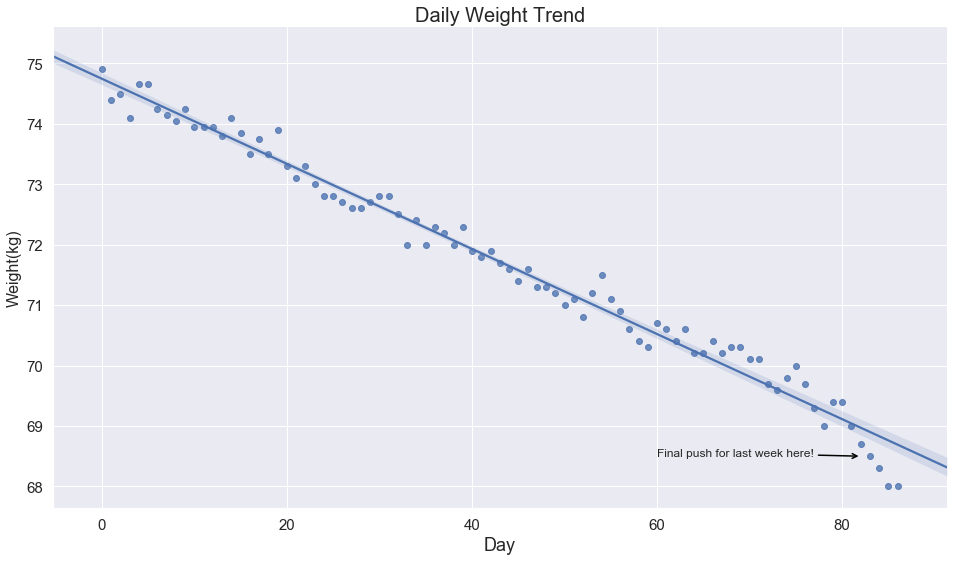

In [4]:
wtp = sns.lmplot(x = "day", y = "weight_tomorrow", data = vdf, order = 1)
wtp.set(xlabel = 'Day', ylabel = 'Weight(kg)', title = 'Daily Weight Trend')
plt.title('Daily Weight Trend', fontsize = 20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Weight(kg)', fontsize=16)
plt.annotate("Final push for last week here!", xy=(82, 68.5), xytext=(60, 68.5), arrowprops=dict(arrowstyle="->", color='black', lw=1.5))
wtp.set_xticklabels(fontsize = 15)
wtp.set_yticklabels(fontsize = 15)
wtp.fig.set_size_inches(15,8)

### Weight change based on excess calories

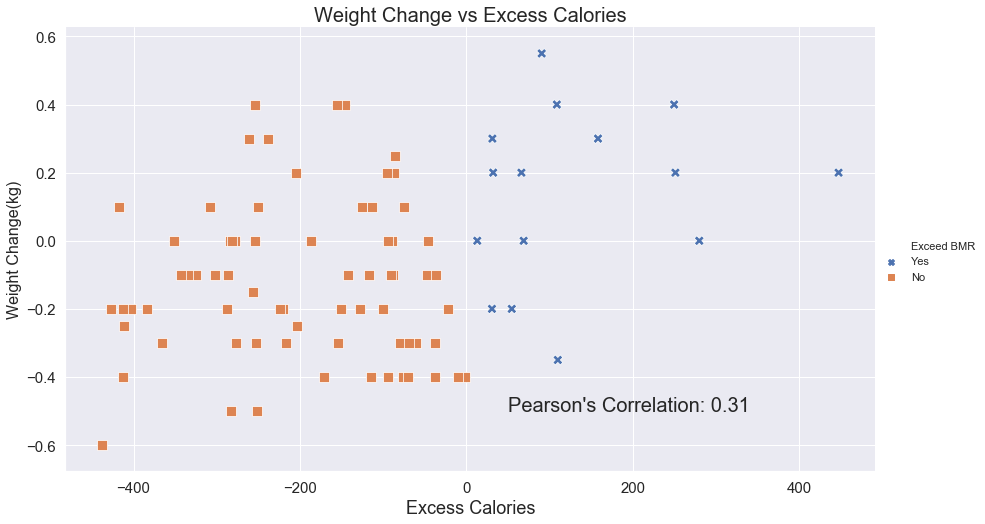

In [5]:
wecp = sns.relplot(x = "excess_calories", y = "weight_change", hue = "IsExcess",
                   style = "IsExcess", markers = {"Yes": "X", "No": "s"}, data = vdf, s = 100)
wecp.fig.set_size_inches(15,8)
lgd = wecp._legend
for t, l in zip(lgd.texts,("Exceed BMR", "Yes","No")):
    t.set_text(l)
plt.text(50,-0.5,"Pearson's Correlation: " + str(round(pearsonr(vdf["excess_calories"],vdf["weight_change"])[0],2)), fontsize = 20)
plt.title('Weight Change vs Excess Calories', fontsize = 20)
plt.xlabel('Excess Calories', fontsize=18)
plt.ylabel('Weight Change(kg)', fontsize=16)
wecp.set_xticklabels(fontsize = 15)
wecp.set_yticklabels(fontsize = 15)
plot_pos(top = 0.9, right = 0.15, left = 0.15)
plt.show()

### Weight change based on protein-carb ratio

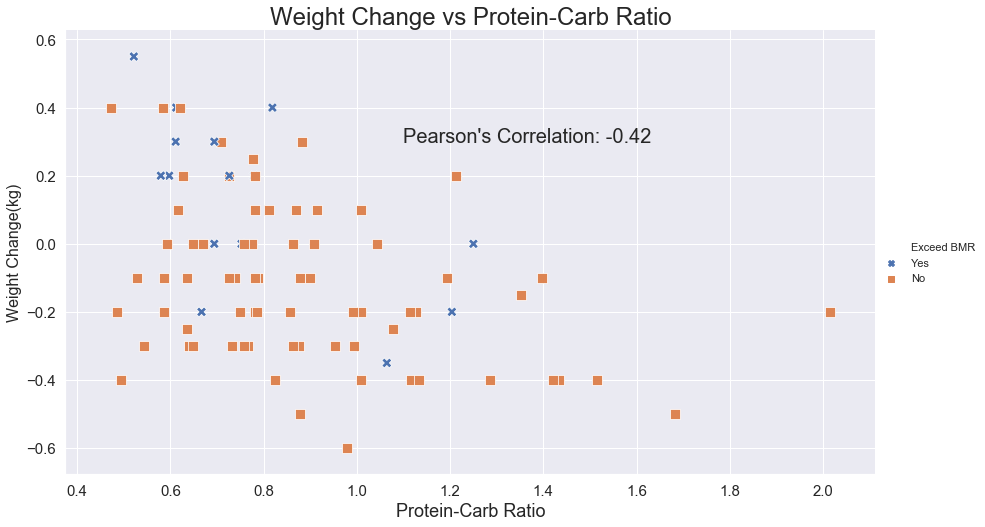

In [6]:
wpcp = sns.relplot(x = "pc_ratio", y = "weight_change",
                   hue = "IsExcess", style = "IsExcess",
                   markers = {"Yes": "X", "No": "s"},data = vdf, s = 100)
lgd = wpcp._legend
for t, l in zip(lgd.texts,("Exceed BMR", "Yes","No")):
    t.set_text(l)
wpcp.fig.set_size_inches(15,8)
plt.title("Weight Change vs Protein-Carb Ratio", fontsize = 24)
plt.text(1.1,0.3,"Pearson's Correlation: " + str(round(pearsonr(vdf["pc_ratio"],vdf["weight_change"])[0],2)), fontsize = 20)
plt.xlabel('Protein-Carb Ratio', fontsize=18)
plt.ylabel('Weight Change(kg)', fontsize=16)
wpcp.set_xticklabels(fontsize = 15)
wpcp.set_yticklabels(fontsize = 15)
plot_pos(top = 0.9, right = 0.15, left = 0.15)
plt.show()

### Weight change based on fat consumption

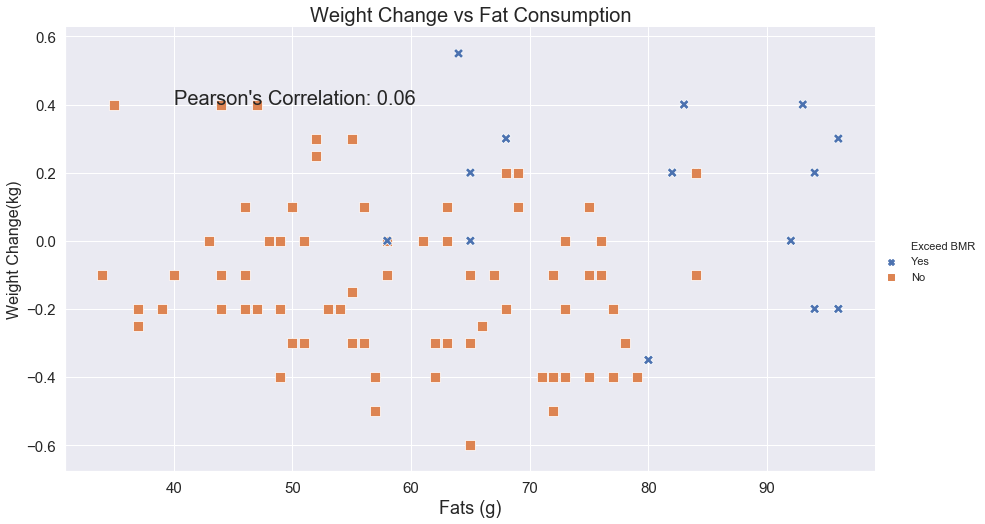

In [7]:
wfp = sns.relplot(x = "fats", y = "weight_change",
                   hue = "IsExcess", style = "IsExcess",
                   markers = {"Yes": "X", "No": "s"},data = vdf, s = 100)
wfp.set(xlabel = 'Fats', ylabel = 'Weight Change(kg)')
wfp.fig.set_size_inches(15,8)
lgd = wfp._legend
for t, l in zip(lgd.texts,("Exceed BMR", "Yes","No")):
    t.set_text(l)
plt.title("Weight Change vs Fat Consumption", fontsize = 20)
plt.text(40,0.4,"Pearson's Correlation: " + str(round(pearsonr(vdf["fats"],vdf["weight_change"])[0],2)), fontsize = 20)
plt.xlabel('Fats (g)', fontsize=18)
plt.ylabel('Weight Change(kg)', fontsize=16)
wfp.set_xticklabels(fontsize = 15)
wfp.set_yticklabels(fontsize = 15)
plot_pos(top = 0.9, right = 0.15, left = 0.15)
plt.show()

### Weight change based on weight lift rate and exercise type

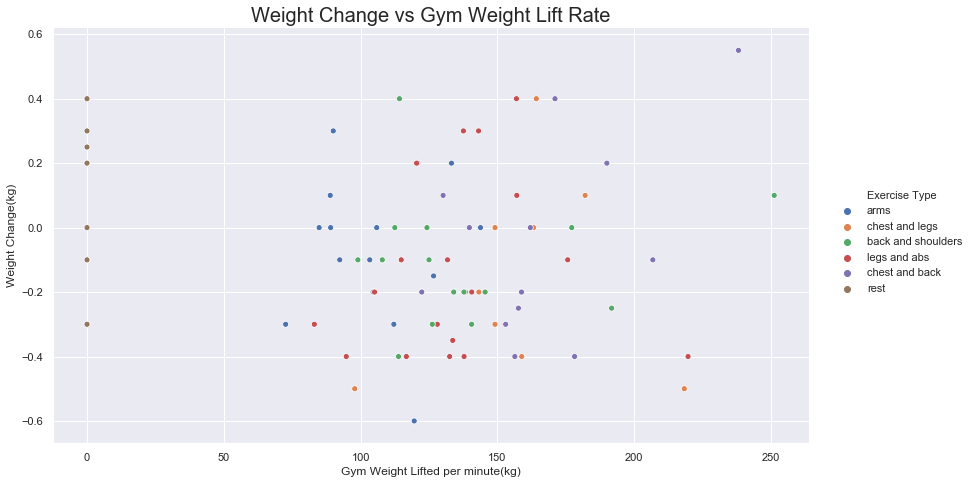

In [8]:
wlrp = sns.relplot(x = "weight_lift_rate", y = "weight_change", hue = "exercise_type",
            data = vdf)
wlrp.set(xlabel = 'Gym Weight Lifted per minute(kg)', ylabel = 'Weight Change(kg)')
wlrp.fig.set_size_inches(15,8)
lgd = wlrp._legend
for t, l in zip(lgd.texts,("Exercise Type", "arms")):
    t.set_text(l)
plt.title("Weight Change vs Gym Weight Lift Rate", fontsize = 20)
plot_pos(top = 0.85, right = 0.15, left = 0.15)
plt.show()

### Weight change based on exercise type

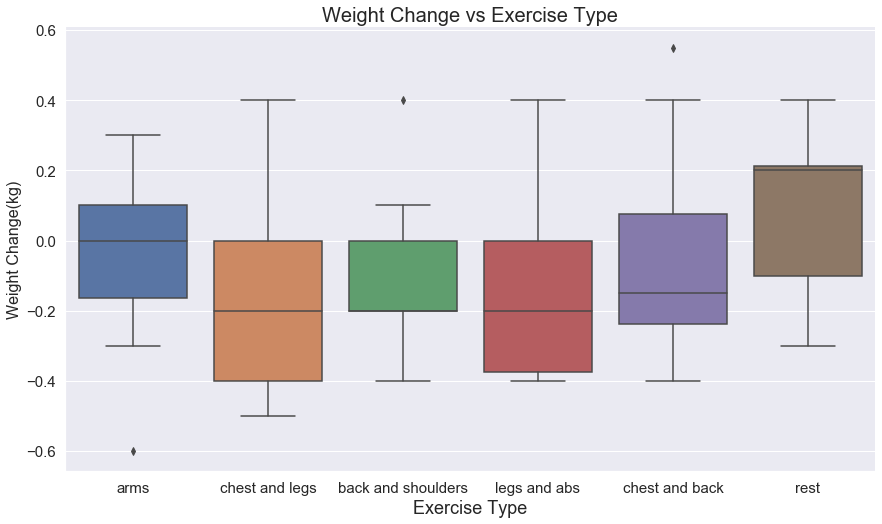

In [9]:
wetp = sns.catplot(x = "exercise_type", y = "weight_change", kind = "box", data = vdf)
wetp.fig.set_size_inches(15,8)
plt.title("Weight Change vs Exercise Type", fontsize = 20)
plt.xlabel('Exercise Type', fontsize=18)
plt.ylabel('Weight Change(kg)', fontsize=16)
wetp.set_xticklabels(fontsize = 15)
wetp.set_yticklabels(fontsize = 15)
plot_pos(top = 0.9, right = 0.2, left = 0.15)
plt.show()

### Pairwise t-test

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight_change ~ exercise_type',
                data=vdf).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
pair_t = mod.t_test_pairwise('exercise_type')
pair_t.result_frame

                 sum_sq    df         F    PR(>F)
exercise_type  0.457322   5.0  1.472389  0.207948
Residual       5.031701  81.0       NaN       NaN


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
back and shoulders-arms,-0.067463,0.086814,-0.777105,0.439360,-0.240195,0.105268,0.980912,False
chest and back-arms,-0.004018,0.091212,-0.044050,0.964973,-0.185501,0.177465,0.995336,False
chest and legs-arms,-0.102431,0.103849,-0.986338,0.326904,-0.309058,0.104197,0.980912,False
legs and abs-arms,-0.081086,0.084569,-0.958807,0.340509,-0.249352,0.087181,0.980912,False
rest-arms,0.132292,0.095179,1.389918,0.168362,-0.057086,0.321669,0.890413,False
chest and back-back and shoulders,0.063445,0.089951,0.705331,0.482628,-0.115529,0.242420,0.980912,False
chest and legs-back and shoulders,-0.034967,0.102744,-0.340335,0.734485,-0.239395,0.169461,0.995030,False
legs and abs-back and shoulders,-0.013622,0.083208,-0.163714,0.870364,-0.179180,0.151935,0.995336,False
rest-back and shoulders,0.199755,0.093972,2.125684,0.036576,0.012780,0.386730,0.399071,False
chest and legs-chest and back,-0.098413,0.106486,-0.924182,0.358136,-0.310287,0.113462,0.980912,False


# Machine Learning Data Preprocessing

In [11]:
# Create dataframe for multivariable regression
mdf = raw_df[["date","weight_change", "weight_tomorrow", "excess_calories",
             "IsExcess","carbs", "protein","pc_ratio","fats",
             "exercise_duration", "exercise_type", "weight_lifted", 
             "weight_lift_rate"]]

# Onehot encoding categorical data
mdf = pd.concat([mdf.drop('exercise_type', axis=1), pd.get_dummies(mdf['exercise_type'])], axis=1)
mdf = pd.concat([mdf.drop('IsExcess', axis=1), pd.get_dummies(mdf['IsExcess'])], axis=1)
mdf = mdf.drop(columns = ['rest','No']) #Prevent dummy variable trap
mdf = mdf.rename(columns = {'Yes':'cat excess calories'})

# Create the X and y variables
y = mdf[["weight_change"]]
X = mdf[["excess_calories","pc_ratio","fats","weight_lift_rate",
               "arms","back and shoulders","chest and back", "chest and legs",
               "legs and abs", "cat excess calories"]]

# Split the dataset into the Training set and Test set and use the last 14 days as test set
X_train = X[:(len(X) - 14)]
y_train = y[:(len(y) - 14)]
X_test = X.tail(14)
y_test = y.tail(14)


### Simple Linear Regression for weight against day

In [12]:
import statsmodels.regression.linear_model as sm
lin_y = vdf["weight_tomorrow"]
lin_X = vdf.loc[:,["day"]].values
lin_X = pd.DataFrame(np.append(arr = np.ones((len(vdf),1)).astype(int), values = lin_X, axis = 1))
lin_X_train = lin_X[:(len(lin_X) - 14)]
lin_y_train = lin_y[:(len(lin_y) - 14)]
lin_X_test = lin_X.tail(14)
lin_y_test = lin_y.tail(14)
lin_reg = sm.OLS(endog = lin_y_train, exog = lin_X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        weight_tomorrow   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     3560.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           2.09e-62
Time:                        00:28:26   Log-Likelihood:                 13.046
No. Observations:                  73   AIC:                            -22.09
Df Residuals:                      71   BIC:                            -17.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             74.6775      0.048   1570.674      0.000      74.583      74.772
1             -0.0680      0.001    -59.662      0.000      -0.070      -0.066
==============================================================================
Omnibus:                        0.586   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.678
Skew:                           0.197   Prob(JB):                        0.712
Kurtosis:                       2.740   Cond. No.                         82.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        weight_tomorrow   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     3560.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           2.09e-62
Time:                        00:28:26   Log-Likelihood:                 13.046
No. Observations:                  73   AIC:                            -22.09
Df Residuals:                      71   BIC:                            -17.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             74.6775      0.048   1570.674      0.000      74.583      74.772
1             -0.0680      0.001    -59.662      0.000      -0.070      -0.066
==============================================================================
Omnibus:                        0.586   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.678
Skew:                           0.197   Prob(JB):                        0.712
Kurtosis:                       2.740   Cond. No.                         82.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
lin_y_pred = lin_reg.predict(lin_X_test)
lin_y_pred

73    69.713356
74    69.645354
75    69.577351
76    69.509348
77    69.441346
78    69.373343
79    69.305341
80    69.237338
81    69.169335
82    69.101333
83    69.033330
84    68.965328
85    68.897325
86    68.829322
dtype: float64

### Multiple Linear Regression

In [15]:
# Multiple Linear Regression using mdf
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X_train = pd.DataFrame(sc_X.fit_transform(X_train), columns = X_train.columns)
sc_X_test = pd.DataFrame(sc_X.transform(X_test), columns = X_test.columns)
sc_y = StandardScaler()
sc_y_train = pd.DataFrame(sc_X.fit_transform(y_train), columns = y_train.columns)
sc_y_test = pd.DataFrame(sc_X.transform(y_test), columns = y_test.columns)
mlr_OLS = sm.OLS(endog = sc_y_train, exog = sc_X_train).fit()
mlr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          weight_change   R-squared (uncentered):                   0.309
Model:                            OLS   Adj. R-squared (uncentered):              0.199
Method:                 Least Squares   F-statistic:                              2.817
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                     0.00595
Time:                        00:28:27   Log-Likelihood:                         -90.092
No. Observations:                  73   AIC:                                      200.2
Df Residuals:                      63   BIC:                                      223.1
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_calories         0.1211      0.165      0.732      0.467      -0.209       0.452
pc_ratio               -0.3029      0.131     -2.315      0.024      -0.564      -0.041
fats                   -0.0378      0.156     -0.243      0.809      -0.349       0.273
weight_lift_rate        0.0566      0.210      0.269      0.789      -0.363       0.477
arms                   -0.1443      0.233     -0.618      0.539      -0.611       0.322
back and shoulders     -0.2546      0.270     -0.945      0.348      -0.793       0.284
chest and back         -0.2048      0.285     -0.719      0.475      -0.774       0.365
chest and legs         -0.2491      0.240     -1.037      0.304      -0.729       0.231
legs and abs           -0.3369      0.289     -1.167      0.248      -0.914       0.240
cat excess calories     0.2308      0.161      1.431      0.157      -0.091       0.553
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   2.713
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                1.011
Skew:                           0.129   Prob(JB):                        0.603
Kurtosis:                       2.485   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Random Forest Regression with GridSearch CV

In [16]:
# Random Forest Regression and Variable Importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
warnings.simplefilter('ignore')
rf = RandomForestRegressor()

param_grid = {
    'bootstrap': [True],
    'oob_score': [True],
    'max_depth': [80, 90, 100, 110],
    'n_estimators': [100, 200, 300, 1000]
}
  
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 10, n_jobs = -1, verbose = 2)

rf_grid_search.fit(sc_X_train, sc_y_train);

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   41.8s finished


#### Creating Variable Importance plot using RFR

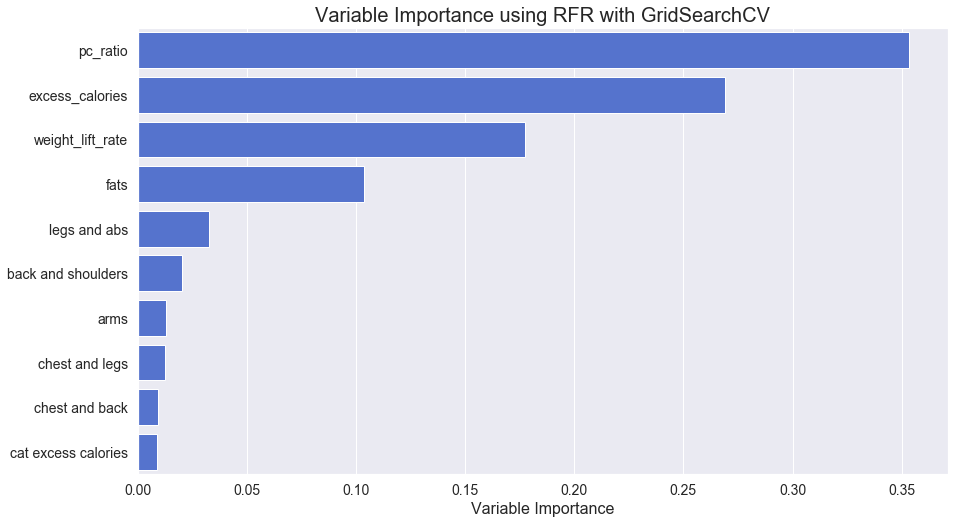

In [17]:
def imp_df(column_names, importances):
  df = pd.DataFrame({'variable': column_names,
                     'variable_importance': importances}) \
         .sort_values('variable_importance', ascending = False) \
         .reset_index(drop = True)
  return df
base_imp = imp_df(sc_X_train.columns, rf_grid_search.best_estimator_.feature_importances_)
## Plot variable importance df
plt.figure(figsize = (15,8))
fig = sns.barplot(x = 'variable_importance', y = 'variable', data = base_imp, orient = 'h', color = 'royalblue')
plt.title("Variable Importance using RFR with GridSearchCV", fontsize = 20)
plt.xlabel('Variable Importance', fontsize = 16)
plt.ylabel('')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plot_pos(top = 0.9, right = 0.2, left = 0.15)
plt.show()

### XGBoost with GridSearch CV

In [18]:
from xgboost import XGBRFRegressor
warnings.simplefilter('ignore')
xgb_rf = XGBRFRegressor()

param_grid = {
    'bootstrap': [True],
    'oob_score': [True],
    'max_depth': [80, 90, 100, 110],
    'n_estimators': [100, 200, 300, 1000]
}
  
xgb_grid_search = GridSearchCV(estimator = xgb_rf, param_grid = param_grid, 
                           cv = 10, n_jobs = -1, verbose = 2)

xgb_grid_search.fit(sc_X_train, sc_y_train);

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   25.5s finished


[00:29:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### Creating Variable Importance plot using XGB

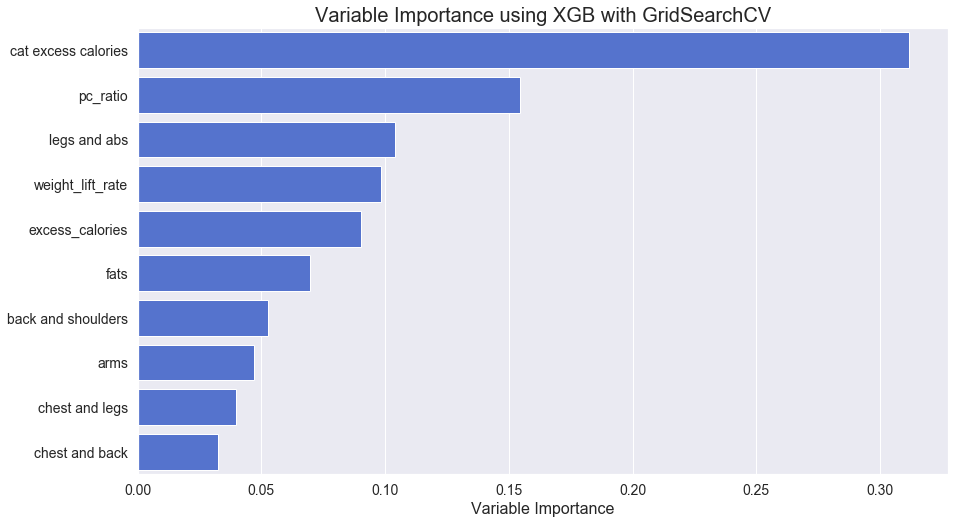

In [19]:
base_imp = imp_df(sc_X_train.columns, xgb_grid_search.best_estimator_.feature_importances_)

plt.figure(figsize = (15,8))
fig = sns.barplot(x = 'variable_importance', y = 'variable', data = base_imp, orient = 'h', color = 'royalblue')
plt.title("Variable Importance using XGB with GridSearchCV", fontsize = 20)
plt.xlabel('Variable Importance', fontsize = 16)
plt.ylabel('')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plot_pos(top = 0.9, right = 0.2, left = 0.15)
plt.show()

### Random Forest Recursive Feature Elimination

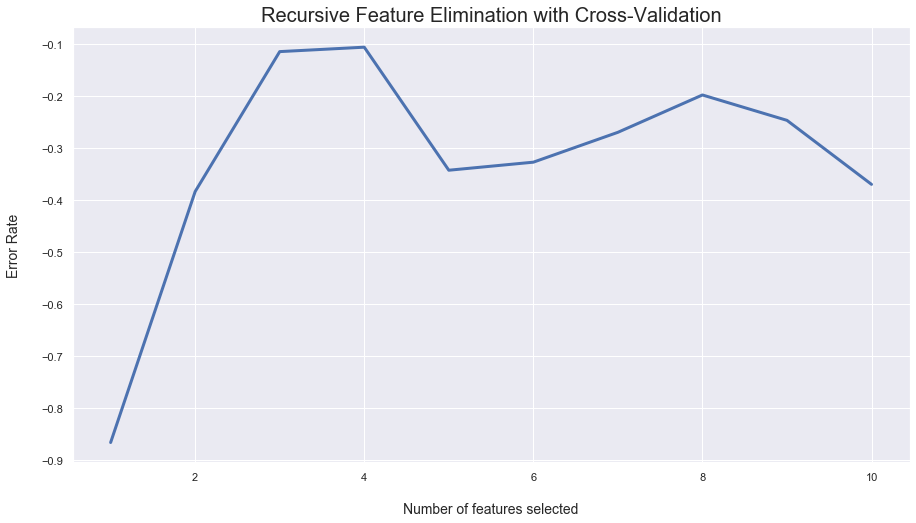

In [57]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=rf, step=1, cv=10)
rfecv.fit(sc_X_train, sc_y_train)

plt.figure(figsize=(15, 8))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('Error Rate', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, linewidth=3)

plt.show()

#### Creating Variable Importance plot using RF-RFE

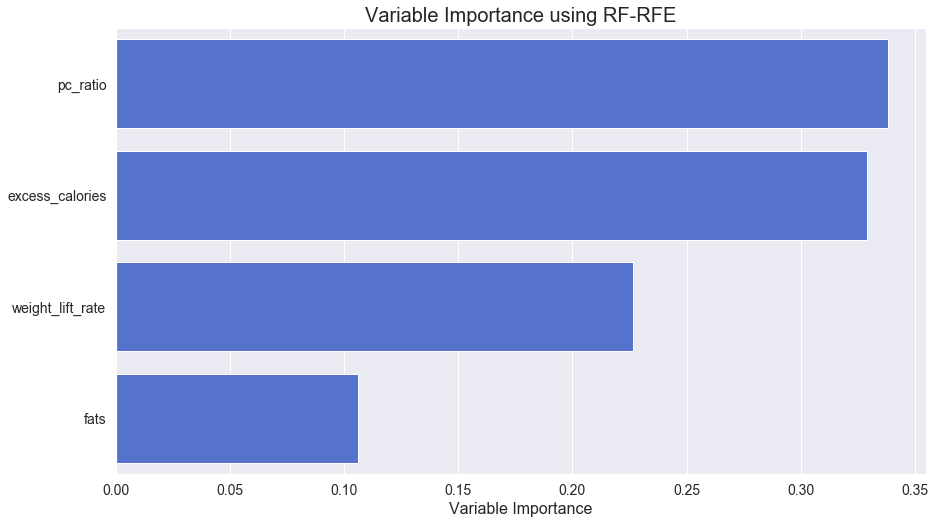

In [34]:
base_imp = imp_df(sc_X_train.columns[np.where(rfecv.support_ == True)], rfecv.estimator_.feature_importances_)

plt.figure(figsize = (15,8))
fig = sns.barplot(x = 'variable_importance', y = 'variable', data = base_imp, orient = 'h', color = 'royalblue')
plt.title("Variable Importance using RF-RFE", fontsize = 20)
plt.xlabel('Variable Importance', fontsize = 16)
plt.ylabel('')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plot_pos(top = 0.9, right = 0.2, left = 0.15)
plt.show()

## Prediction and Evaluation

In [36]:
actual_weight_loss = -round(vdf['weight_tomorrow'][72] - vdf['weight_tomorrow'][86],2)

## For MLR
mlr_y_pred = mlr_OLS.predict(sc_X_test)
mlr_y_pred = sc_X.inverse_transform(mlr_y_pred)
mlr_score = abs(mlr_y_pred - y_test['weight_change']).mean()
mlr_sum = mlr_y_pred.sum()

## For RF
rf_y_pred = rf_grid_search.predict(sc_X_test)
rf_y_pred = sc_X.inverse_transform(rf_y_pred)
rf_score = abs(rf_y_pred - y_test['weight_change']).mean()
rf_sum = rf_y_pred.sum()

## For XGB
xgb_y_pred = xgb_grid_search.predict(sc_X_test)
xgb_y_pred = sc_X.inverse_transform(xgb_y_pred)
xgb_score = abs(xgb_y_pred - y_test['weight_change']).mean()
xgb_sum = xgb_y_pred.sum()

## For RFECV
rfecv_y_pred = rfecv.predict(sc_X_test)
rfecv_y_pred = sc_X.inverse_transform(rfecv_y_pred)
rfecv_score = abs(rfecv_y_pred - y_test['weight_change']).mean()
rfecv_sum = rfecv_y_pred.sum()


result = {'MLR': [mlr_score, mlr_sum],
          'RFR': [rf_score, rf_sum],
          'XGB': [xgb_score, xgb_sum],
          'RFE': [rfecv_score, rfecv_sum],
          'Actual': [0, actual_weight_loss]
  }

result_df = pd.DataFrame(data = result, index = ['Mean Absolute Error','14-day predicted weight loss (kg)'])
result_df

,MLR,RFR,XGB,RFE,Actual
Mean Absolute Error,0.163363,0.178786,0.206646,0.1725,0.0
14-day predicted weight loss (kg),-0.446874,-0.277000,-0.155787,-0.9650,-1.7
